In [1]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately
train = pd.read_csv("train.csv")
print(train.head(5))
print("The shape of the data is:",train.shape)
print("Statistical properties of the data is:")
print(train.describe())
print("Correlation of the data is:")
print(train.corr())

      Id              Name  Age       Nationality  Overall  Potential  \
0  17221      F. Burdenski   25           Germany       54         58   
1  11353         A. Deiola   21             Italy       64         73   
2   3402       T. Castagne   21           Belgium       72         79   
3  16071         D. Gorman   21  Northern Ireland       57         66   
4  12380  N. Molina Lucero   19         Argentina       63         75   

            Club  Value (M)  Wage (M) Position  
0  Korona Kielce       0.07     0.001      CDM  
1       Cagliari       0.70     0.010       CM  
2       Atalanta       3.70     0.013       RB  
3      Stevenage       0.16     0.002       CM  
4   Boca Juniors       0.55     0.002       LB  
The shape of the data is: (14384, 10)
Statistical properties of the data is:
                 Id           Age       Overall     Potential     Value (M)  \
count  14384.000000  14384.000000  14384.000000  14384.000000  14384.000000   
mean    8992.892728     25.14877

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

In [3]:
# choose categorical and continuous features from data

categorical_columns = [c for c in train.columns 
                       if train[c].dtype.name == 'object']
numerical_columns = [c for c in train.columns 
                     if train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['Name', 'Nationality', 'Club', 'Position']
numerical_columns: ['Id', 'Age', 'Overall', 'Potential', 'Value (M)', 'Wage (M)']


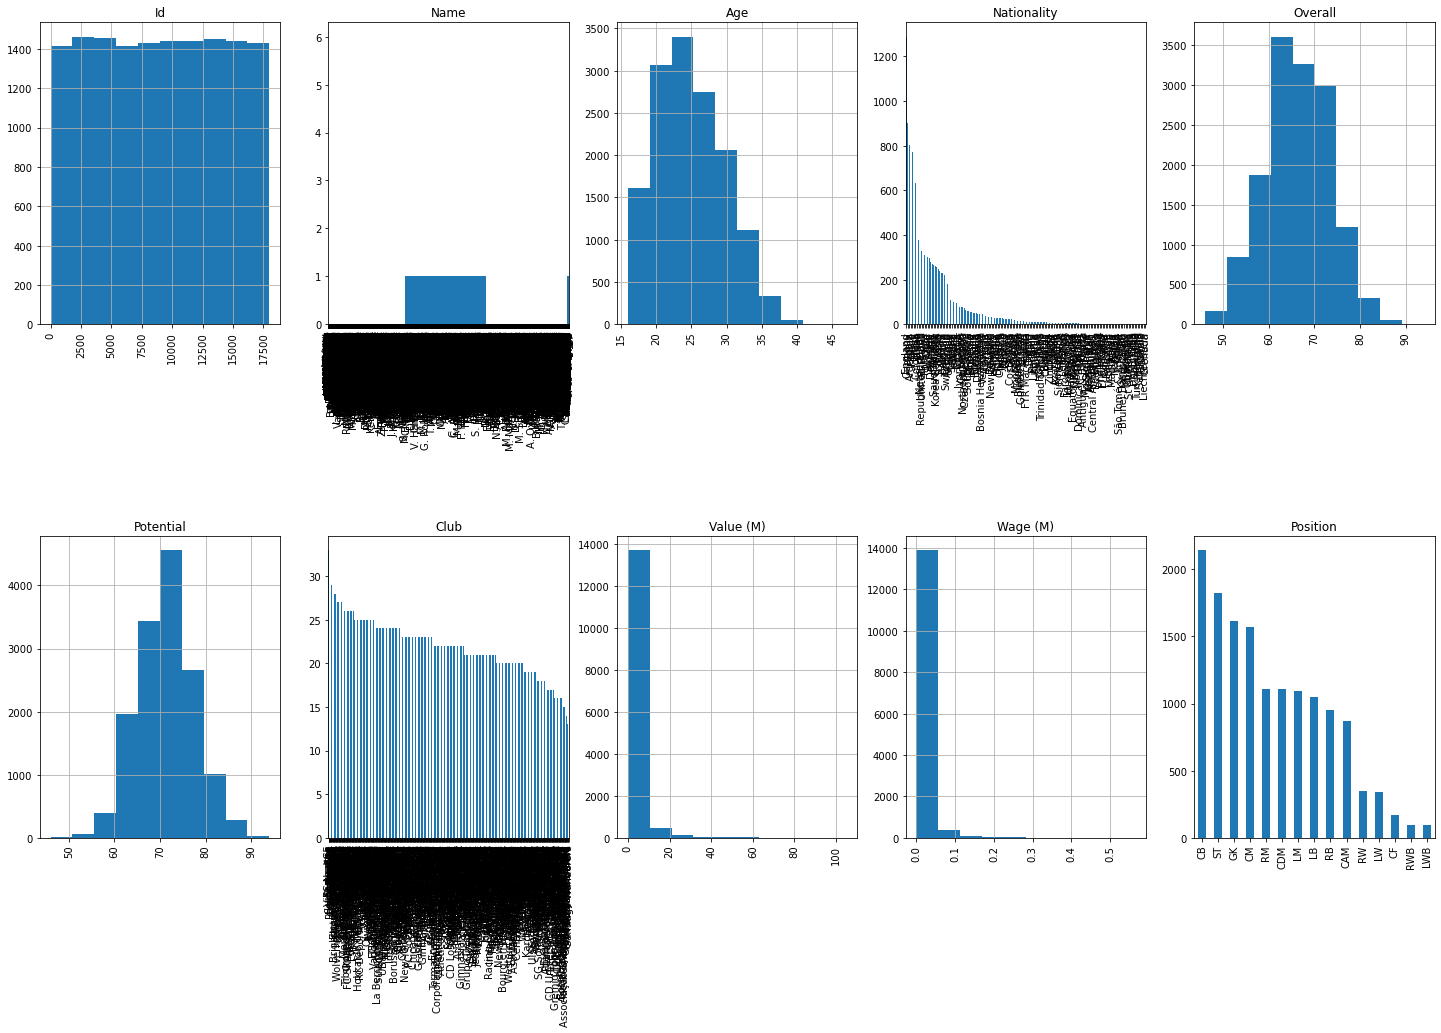

In [4]:
# Code starts here

fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(train.shape[1]) / cols)
for i, column in enumerate(train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# Code ends here.

<AxesSubplot:xlabel='Value (M)', ylabel='Density'>

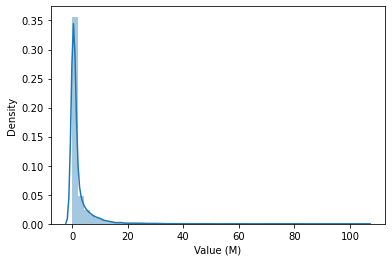

In [5]:
# Code Starts here
sns.distplot(train['Value (M)'])
# Code ends here

<AxesSubplot:>

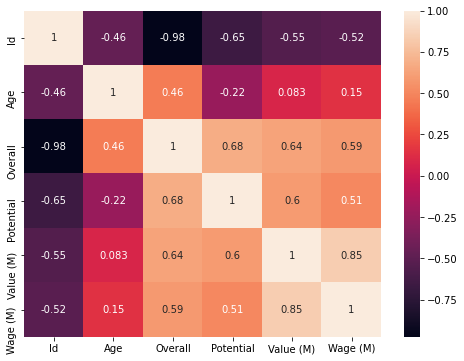

In [9]:
# Correlation matrix for training set
corr = train.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2g")

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [11]:
x = train.drop(["Id","Value (M)","Name","Nationality","Club","Position"],1)
y = train['Value (M)']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=36,test_size=0.2)

In [12]:
# Code Starts here

linregression = LinearRegression()
linregression.fit(x_train,y_train)
y_pred = linregression.predict(x_test)

# calculate the mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolute error is:",mae)
# calculate the r2 score
r2 = r2_score(y_test,y_pred)
print("R2 score is:",r2)

# Code ends here

Mean absolute error is: 1.3623044650840077
R2 score is: 0.7756329844839305


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly_model.fit(x_train,y_train)
y_pred_poly = poly_model.predict(x_test)
# calculate the r2 score
r2_poly = r2_score(y_test,y_pred_poly)
print("R2 score is:",r2_poly)


R2 score is: 0.9790103896011728


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [14]:
# Code Starts here

# Storing the id from the test file
test = pd.read_csv('test.csv')
Id = test['Id']

#Drop the same columns as train data
test = test.drop(["Id","Name","Nationality","Club","Position"],1)

#predict on test data using trained model
y_pred_test = poly_model.predict(test)

# Create a sample submission file
final_submission = pd.DataFrame({'Id':Id,'Value (M)':y_pred_test})

# Convert the sample submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)

# Code ends here